In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import json
import itertools
from ase.visualize import view
from pymatgen.io.ase import AseAtomsAdaptor
import matplotlib.pyplot as plt
from data import read_csv_cif, read_defects_descriptions, read_flat
from pymatgen.io.cif import CifParser
import os
import sys

# sys.path.append( '/Users/rmgaliullin/ai4material_design' )

# from ai4mat.common.atom_to_graph import AtomsToGraphs

The path assumes we are in the project tree. If you just downloaded the archive, chage it.

In [3]:
example_dataset_path = Path("/Users/rmgaliullin/ai4material_design/datasets/csv_cif/dichalcogenides_MoS2_all")

In [4]:
BP_structures, BP_defects = read_csv_cif(example_dataset_path)
BP_targets = pd.read_csv("/Users/rmgaliullin/ai4material_design/datasets/processed/dichalcogenides_MoS2_all/targets.csv.gz", index_col="_id")

  0%|          | 0/9422 [00:00<?, ?it/s]/Users/rmgaliullin/ai4material_design/.venv/lib/python3.9/site-packages/pymatgen/io/cif.py:1160: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
 22%|██▏       | 2115/9422 [00:32<01:52, 65.03it/s]


KeyboardInterrupt: 

In [14]:
BP_structures.loc['6141cf0efbfd4bd9ab2c2f7e']['initial_structure']

Structure Summary
Lattice
    abc : 25.5225256 25.5225256 14.879004
 angles : 90.0 90.0 119.99999999999999
 volume : 8393.668021812642
      A : 25.5225256 0.0 1.5628039641098191e-15
      B : -12.761262799999997 22.103155538338676 1.5628039641098191e-15
      C : 0.0 0.0 14.879004
    pbc : True True True
PeriodicSite: Mo0 (Mo) (1.276e-07, 1.842, 3.72) [0.04167, 0.08333, 0.25]
PeriodicSite: Mo1 (Mo) (-1.595, 4.605, 3.72) [0.04167, 0.2083, 0.25]
PeriodicSite: Mo2 (Mo) (-3.19, 7.368, 3.72) [0.04167, 0.3333, 0.25]
PeriodicSite: Mo3 (Mo) (-4.785, 10.13, 3.72) [0.04167, 0.4583, 0.25]
PeriodicSite: Mo4 (Mo) (-6.381, 12.89, 3.72) [0.04167, 0.5833, 0.25]
PeriodicSite: Mo5 (Mo) (-7.976, 15.66, 3.72) [0.04167, 0.7083, 0.25]
PeriodicSite: Mo6 (Mo) (-9.571, 18.42, 3.72) [0.04167, 0.8333, 0.25]
PeriodicSite: Mo7 (Mo) (-11.17, 21.18, 3.72) [0.04167, 0.9583, 0.25]
PeriodicSite: Mo8 (Mo) (3.19, 1.842, 3.72) [0.1667, 0.08333, 0.25]
PeriodicSite: Mo9 (Mo) (1.595, 4.605, 3.72) [0.1667, 0.2083, 0.25]
Per

In [15]:
defect = BP_defects.loc["6141cf0efbfd4bd9ab2c2f7c"]
bulk_structure = CifParser(os.path.join('/Users/rmgaliullin/ai4material_design/defects_generation/molecules', f'''{defect["base"]}.cif''')).get_structures()[0]
bulk_structure.make_supercell(defect["cell"])
bulk_structure

/Users/rmgaliullin/ai4material_design/.venv/lib/python3.9/site-packages/pymatgen/io/cif.py:1168: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


Structure Summary
Lattice
    abc : 25.522525600000005 25.5225256 14.879004
 angles : 90.0 90.0 120.00000000000001
 volume : 8393.668021812642
      A : -12.761262800000004 -22.103155538338676 -3.1256079282196383e-15
      B : -12.761262799999997 22.103155538338676 1.5628039641098191e-15
      C : 0.0 0.0 -14.879004
    pbc : True True True
PeriodicSite: Mo0 (Mo) (-1.595, -0.921, -11.16) [0.08333, 0.04167, 0.75]
PeriodicSite: Mo0 (Mo) (-3.19, 1.842, -11.16) [0.08333, 0.1667, 0.75]
PeriodicSite: Mo0 (Mo) (-4.785, 4.605, -11.16) [0.08333, 0.2917, 0.75]
PeriodicSite: Mo0 (Mo) (-6.381, 7.368, -11.16) [0.08333, 0.4167, 0.75]
PeriodicSite: Mo0 (Mo) (-7.976, 10.13, -11.16) [0.08333, 0.5417, 0.75]
PeriodicSite: Mo0 (Mo) (-9.571, 12.89, -11.16) [0.08333, 0.6667, 0.75]
PeriodicSite: Mo0 (Mo) (-11.17, 15.66, -11.16) [0.08333, 0.7917, 0.75]
PeriodicSite: Mo0 (Mo) (-12.76, 18.42, -11.16) [0.08333, 0.9167, 0.75]
PeriodicSite: Mo0 (Mo) (-3.19, -3.684, -11.16) [0.2083, 0.04167, 0.75]
PeriodicSite: Mo0

In [16]:
defected = BP_structures.loc['6141cf0efbfd4bd9ab2c2f7e']['initial_structure']
BP_structures.loc['6141cf0efbfd4bd9ab2c2f7e']['initial_structure'] #site.distance(new_site)
type(defected)

pymatgen.core.structure.Structure

In [22]:
a2g = AtomsToGraphs()
return a2g.convert_all(self._atoms, metadata_collection=self._data)

Mo1 S1


In [17]:
(-6.38063149 + -3.19031583)/2

-4.78547366

In [18]:
get_defect_coords(defect, defected, 1)

NameError: name 'get_defect_coords' is not defined

In [19]:
BP_targets.head()

,energy,energy_per_atom,formation_energy,formation_energy_per_site,band_gap,homo,lumo,fermi_level
_id,,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,-1391.340414,-7.284505,2.645686,2.645686,1.1452,-0.6754,0.4698,-0.199707
6141cf0f51c1cbd9654b8870,-1384.552821,-7.287120,5.306279,2.653139,1.0843,-0.6852,0.3991,-0.220627
6141cf0fe689ecc4c43cdd4b,-1397.196141,-7.277063,0.278959,0.278959,1.8033,-0.6931,1.1102,-0.183537
6141cf10b842c2e72e2f2d44,-1396.257593,-7.272175,0.579507,0.289753,1.8095,-0.6916,1.1179,-0.179802
6141cf1051c1cbd9654b8872,-1384.532677,-7.287014,5.326423,2.663212,1.1102,-0.6718,0.4384,-0.213190


In [20]:
data = [BP_structures, BP_defects, BP_targets]

`BP_structures` contains the initial unrelaxed structures, along with the high-level variables computed with DFT

In [21]:
BP_structures.head()

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,initial_structure
_id,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,6141cf0efbfd4bd9ab2c2f7c,-1391.340414,-7.284505,-0.199707,-0.6754,0.4698,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...
6141cf0f51c1cbd9654b8870,6141cf0e51c1cbd9654b886e,-1384.552821,-7.287120,-0.220627,-0.6852,0.3991,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...
6141cf0fe689ecc4c43cdd4b,6141cf0fe689ecc4c43cdd49,-1397.196141,-7.277063,-0.183537,-0.6931,1.1102,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...
6141cf10b842c2e72e2f2d44,6141cf10b842c2e72e2f2d42,-1396.257593,-7.272175,-0.179802,-0.6916,1.1179,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...
6141cf1051c1cbd9654b8872,6141cf0e51c1cbd9654b886e,-1384.532677,-7.287014,-0.213190,-0.6718,0.4384,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...


In [22]:
BP_defects.head()

,description,base,cell,pbc,defects
_id,,,,,
6141cf0efbfd4bd9ab2c2f7c,X1,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}]"
6141cf0e51c1cbd9654b886e,X2,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':..."
6141cf0fe689ecc4c43cdd49,X3,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf10b842c2e72e2f2d42,X4,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf10cc0e69a0cf28ab33,X5,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':..."


In [23]:
BP_defects.head()

,description,base,cell,pbc,defects
_id,,,,,
6141cf0efbfd4bd9ab2c2f7c,X1,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}]"
6141cf0e51c1cbd9654b886e,X2,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':..."
6141cf0fe689ecc4c43cdd49,X3,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf10b842c2e72e2f2d42,X4,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf10cc0e69a0cf28ab33,X5,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':..."


We can merge the defect descriptions and targets into a single DataFrame

In [24]:
BP_flat = BP_structures.combine_first(BP_targets).merge(BP_defects, how="left", left_on="descriptor_id", right_index=True)

In [25]:
BP_flat['defect_count'] = BP_flat['defects'].apply(lambda x: len(x))

In [26]:
BP_flat.head()

,band_gap,descriptor_id,energy,energy_per_atom,fermi_level,formation_energy,formation_energy_per_site,homo,initial_structure,lumo,description,base,cell,pbc,defects,defect_count
_id,,,,,,,,,,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,1.1452,6141cf0efbfd4bd9ab2c2f7c,-1391.340414,-7.284505,-0.199707,2.645686,2.645686,-0.6754,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4698,X1,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}]",1
6141cf0f51c1cbd9654b8870,1.0843,6141cf0e51c1cbd9654b886e,-1384.552821,-7.287120,-0.220627,5.306279,2.653139,-0.6852,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.3991,X2,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2
6141cf0fe689ecc4c43cdd4b,1.8033,6141cf0fe689ecc4c43cdd49,-1397.196141,-7.277063,-0.183537,0.278959,0.278959,-0.6931,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1102,X3,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",1
6141cf10b842c2e72e2f2d44,1.8095,6141cf10b842c2e72e2f2d42,-1396.257593,-7.272175,-0.179802,0.579507,0.289753,-0.6916,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1179,X4,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",2
6141cf1051c1cbd9654b8872,1.1102,6141cf0e51c1cbd9654b886e,-1384.532677,-7.287014,-0.213190,5.326423,2.663212,-0.6718,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4384,X2,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2


In [27]:
import pandas as pd

# Assuming the DataFrame is called 'df'
BP_flat['concatenated_defects'] = BP_flat['defects'].apply(lambda x: ''.join(sorted([str(x) for i in x])))

# Print the updated DataFrame
BP_flat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9422 entries, 6141cf0efbfd4bd9ab2c2f7e to 61524ab7b44c3cef9d45fba8
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   band_gap                   9422 non-null   float64
 1   descriptor_id              9422 non-null   object 
 2   energy                     9422 non-null   float64
 3   energy_per_atom            9422 non-null   float64
 4   fermi_level                9422 non-null   float64
 5   formation_energy           9422 non-null   float64
 6   formation_energy_per_site  9422 non-null   float64
 7   homo                       9422 non-null   float64
 8   initial_structure          9422 non-null   object 
 9   lumo                       9422 non-null   float64
 10  description                9422 non-null   object 
 11  base                       9422 non-null   object 
 12  cell                       9422 non-null   object 
 13  pbc       

In [28]:
BP_flat.head()

,band_gap,descriptor_id,energy,energy_per_atom,fermi_level,formation_energy,formation_energy_per_site,homo,initial_structure,lumo,description,base,cell,pbc,defects,defect_count,concatenated_defects
_id,,,,,,,,,,,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,1.1452,6141cf0efbfd4bd9ab2c2f7c,-1391.340414,-7.284505,-0.199707,2.645686,2.645686,-0.6754,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4698,X1,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}]",1,"[{'type': 'vacancy', 'element': 'S'}]"
6141cf0f51c1cbd9654b8870,1.0843,6141cf0e51c1cbd9654b886e,-1384.552821,-7.287120,-0.220627,5.306279,2.653139,-0.6852,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.3991,X2,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2,"[{'type': 'vacancy', 'element': 'S'}, {'type':..."
6141cf0fe689ecc4c43cdd4b,1.8033,6141cf0fe689ecc4c43cdd49,-1397.196141,-7.277063,-0.183537,0.278959,0.278959,-0.6931,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1102,X3,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",1,"[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf10b842c2e72e2f2d44,1.8095,6141cf10b842c2e72e2f2d42,-1396.257593,-7.272175,-0.179802,0.579507,0.289753,-0.6916,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1179,X4,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",2,"[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf1051c1cbd9654b8872,1.1102,6141cf0e51c1cbd9654b886e,-1384.532677,-7.287014,-0.213190,5.326423,2.663212,-0.6718,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4384,X2,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2,"[{'type': 'vacancy', 'element': 'S'}, {'type':..."


Visualisation

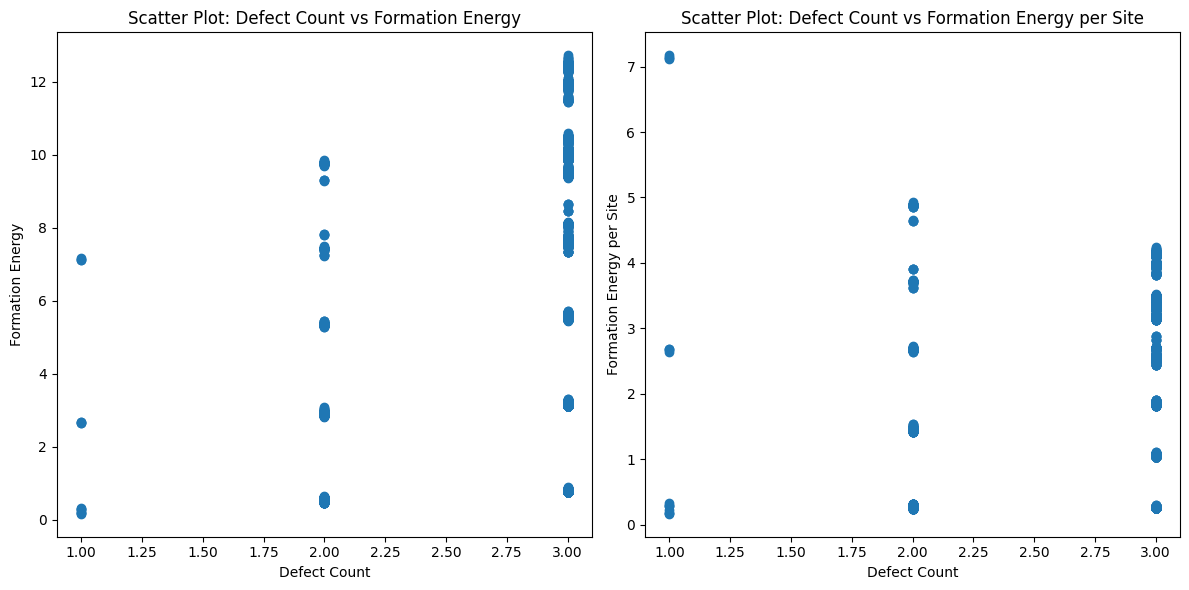

In [29]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for defect_count vs formation_energy
ax1.scatter(BP_flat['defect_count'], BP_flat['formation_energy'])
ax1.set_xlabel('Defect Count')
ax1.set_ylabel('Formation Energy')
ax1.set_title('Scatter Plot: Defect Count vs Formation Energy')

# Scatter plot for defect_count vs formation_energy_per_site
ax2.scatter(BP_flat['defect_count'], BP_flat['formation_energy_per_site'])
ax2.set_xlabel('Defect Count')
ax2.set_ylabel('Formation Energy per Site')
ax2.set_title('Scatter Plot: Defect Count vs Formation Energy per Site')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the figure with both subplots
plt.show()

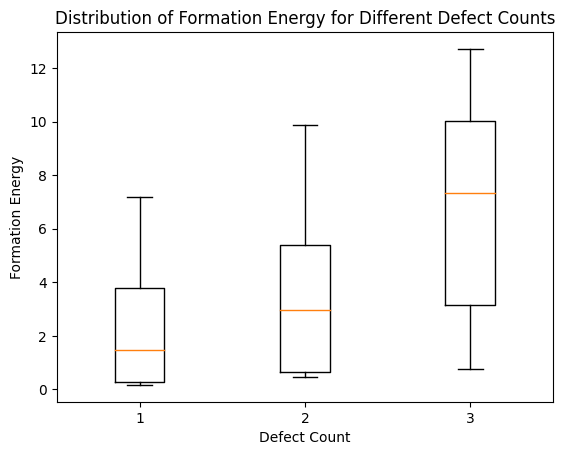

In [30]:
# Create a list of formation_energy for each defect_count value
data = [BP_flat.loc[BP_flat['defect_count'] == count]['formation_energy'] for count in BP_flat['defect_count'].unique()]
# print(data[0])
# Plot a box plot for each defect_count group
fig, ax = plt.subplots()
ax.boxplot(data, labels=BP_flat['defect_count'].unique())

ax.set_xlabel('Defect Count')
ax.set_ylabel('Formation Energy')
ax.set_title('Distribution of Formation Energy for Different Defect Counts')

plt.show()

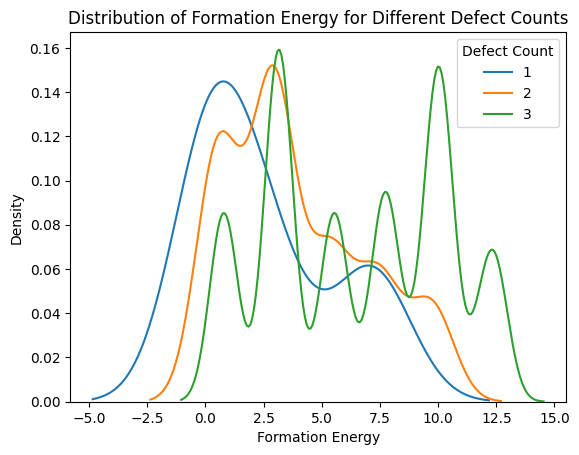

In [31]:
# Create a line plot for each defect_count group
fig, ax = plt.subplots()

# Group the data by defect_count and get the formation_energy for each group
grouped_data = BP_flat.groupby('defect_count')['formation_energy'].apply(list)

for count, energy_list in grouped_data.items():
    sns.kdeplot(energy_list, ax=ax, label=str(count))

ax.set_xlabel('Formation Energy')
ax.set_ylabel('Density')
ax.set_title('Distribution of Formation Energy for Different Defect Counts')
ax.legend(title='Defect Count')

plt.show()

In [32]:
np.unique([str(j) for i in BP_flat['defects'] for j in i])

array(["{'type': 'substitution', 'from': 'Mo', 'to': 'W'}",
       "{'type': 'substitution', 'from': 'S', 'to': 'Se'}",
       "{'type': 'vacancy', 'element': 'Mo'}",
       "{'type': 'vacancy', 'element': 'S'}"], dtype='<U49')

In [33]:
np.unique([j['type'] for i in BP_flat['defects'] for j in i])

array(['substitution', 'vacancy'], dtype='<U12')

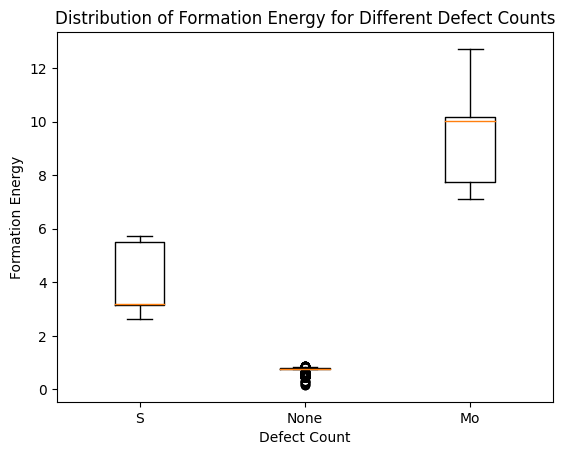

In [34]:
# Extract type of vacancy from the dictionary in 'defects' column
def get_vacancy_type(defects):
    for i in defects:
        if i['type'] == 'vacancy':
            return i['element']
    return "None"
BP_flat['vacancy_type'] = BP_flat['defects'].apply(get_vacancy_type)

# Filter rows with non-null vacancy_type
# BP_flat_filtered = BP_flat.dropna(subset=['vacancy_type'])
data = [BP_flat.loc[BP_flat['vacancy_type'] == vacancy_type]['formation_energy'] for vacancy_type in BP_flat['vacancy_type'].unique()]

fig, ax = plt.subplots()
ax.boxplot(data, labels=BP_flat['vacancy_type'].unique())

ax.set_xlabel('Defect Count')
ax.set_ylabel('Formation Energy')
ax.set_title('Distribution of Formation Energy for Different Defect Counts')

plt.show()

In [35]:
# Define the defect types
defect_types = ["{'type': 'substitution', 'from': 'Mo', 'to': 'W'}",
                "{'type': 'substitution', 'from': 'S', 'to': 'Se'}",
                "{'type': 'vacancy', 'element': 'Mo'}",
                "{'type': 'vacancy', 'element': 'S'}"]

# Create indicator columns
for defect_type in defect_types:
    column_name = ""
    if "vacancy" in defect_type:
        column_name+="vacancy_"
    if "substitution" in defect_type:
        column_name+="substitution_"
    if "element" in defect_type:
        column_name+='Mo' if 'Mo' in defect_type else 'S'
    if "from" in defect_type:
        column_name+='Mo_W' if 'Mo' in defect_type else 'S_Se'

    BP_flat[column_name] = BP_flat['defects'].apply(lambda x: sum([int(str(i) == defect_type) for i in x]))

# Print the updated DataFrame
BP_flat.head()

,band_gap,descriptor_id,energy,energy_per_atom,fermi_level,formation_energy,formation_energy_per_site,homo,initial_structure,lumo,...,cell,pbc,defects,defect_count,concatenated_defects,vacancy_type,substitution_Mo_W,substitution_S_Se,vacancy_Mo,vacancy_S
_id,,,,,,,,,,,,,,,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,1.1452,6141cf0efbfd4bd9ab2c2f7c,-1391.340414,-7.284505,-0.199707,2.645686,2.645686,-0.6754,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4698,...,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}]",1,"[{'type': 'vacancy', 'element': 'S'}]",S,0,0,0,1
6141cf0f51c1cbd9654b8870,1.0843,6141cf0e51c1cbd9654b886e,-1384.552821,-7.287120,-0.220627,5.306279,2.653139,-0.6852,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.3991,...,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2,"[{'type': 'vacancy', 'element': 'S'}, {'type':...",S,0,0,0,2
6141cf0fe689ecc4c43cdd4b,1.8033,6141cf0fe689ecc4c43cdd49,-1397.196141,-7.277063,-0.183537,0.278959,0.278959,-0.6931,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1102,...,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",1,"[{'type': 'substitution', 'from': 'S', 'to': '...",None,0,1,0,0
6141cf10b842c2e72e2f2d44,1.8095,6141cf10b842c2e72e2f2d42,-1396.257593,-7.272175,-0.179802,0.579507,0.289753,-0.6916,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1179,...,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",2,"[{'type': 'substitution', 'from': 'S', 'to': '...",None,0,2,0,0
6141cf1051c1cbd9654b8872,1.1102,6141cf0e51c1cbd9654b886e,-1384.532677,-7.287014,-0.213190,5.326423,2.663212,-0.6718,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4384,...,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2,"[{'type': 'vacancy', 'element': 'S'}, {'type':...",S,0,0,0,2


In [36]:
# import matplotlib.pyplot as plt

# # Define a mapping of column names to colors for the histograms
# defects_colors = {
#     'substitution_Mo_W': 'red',
#     'substitution_S_Se': 'blue',
#     'vacancy_Mo': 'green',
#     'vacancy_S': 'yellow'
# }

# # Create an empty plot
# fig, ax = plt.subplots()

# # Plot a histogram for formation_energy for each defect type
# for defect, color in defects_colors.items():
#     filtered_df = BP_flat[BP_flat[defect]]
#     ax.hist(filtered_df['formation_energy'], bins=30, alpha=0.7, color=color, label=defect)

# # Add legend, labels, and title
# ax.legend(title='Defect Types')
# ax.set_xlabel('Formation Energy')
# ax.set_ylabel('Frequency')
# ax.set_title('Histogram of Formation Energy for Different Defect Types')

# # Display the plot
# plt.show()

In [37]:
defect_types = ['substitution_Mo_W', 'substitution_S_Se', 'vacancy_Mo', 'vacancy_S']

max_defects_number = BP_flat['defects'].apply(len).max()
max_defects_number

3

In [38]:
example_structure_id = BP_flat.index[20]
example_structure_id

'6141cf1302d926221cabc549'

In [39]:
BP_flat.loc[example_structure_id].base

'MoS2'

In [40]:
BP_flat.loc[example_structure_id].defects

[{'type': 'vacancy', 'element': 'Mo'}, {'type': 'vacancy', 'element': 'S'}]

In [41]:
BP_flat.loc[example_structure_id].initial_structure

Structure Summary
Lattice
    abc : 25.5225256 25.5225256 14.879004
 angles : 90.0 90.0 119.99999999999999
 volume : 8393.668021812642
      A : 25.5225256 0.0 1.5628039641098191e-15
      B : -12.761262799999997 22.103155538338676 1.5628039641098191e-15
      C : 0.0 0.0 14.879004
    pbc : True True True
PeriodicSite: Mo0 (Mo) (1.276e-07, 1.842, 3.72) [0.04167, 0.08333, 0.25]
PeriodicSite: Mo1 (Mo) (-1.595, 4.605, 3.72) [0.04167, 0.2083, 0.25]
PeriodicSite: Mo2 (Mo) (-3.19, 7.368, 3.72) [0.04167, 0.3333, 0.25]
PeriodicSite: Mo3 (Mo) (-4.785, 10.13, 3.72) [0.04167, 0.4583, 0.25]
PeriodicSite: Mo4 (Mo) (-6.381, 12.89, 3.72) [0.04167, 0.5833, 0.25]
PeriodicSite: Mo5 (Mo) (-7.976, 15.66, 3.72) [0.04167, 0.7083, 0.25]
PeriodicSite: Mo6 (Mo) (-9.571, 18.42, 3.72) [0.04167, 0.8333, 0.25]
PeriodicSite: Mo7 (Mo) (-11.17, 21.18, 3.72) [0.04167, 0.9583, 0.25]
PeriodicSite: Mo8 (Mo) (3.19, 1.842, 3.72) [0.1667, 0.08333, 0.25]
PeriodicSite: Mo9 (Mo) (1.595, 4.605, 3.72) [0.1667, 0.2083, 0.25]
Per

In [42]:
from ase.visualize import view
from pymatgen.io.ase import AseAtomsAdaptor

In [46]:
# Crashes at CRP, but might work for you
# view(AseAtomsAdaptor.get_atoms(BP_structures.loc[example_structure_id].initial_structure), viewer='ngl')
view(AseAtomsAdaptor.get_atoms(BP_structures.loc[example_structure_id].initial_structure), viewer='x3d')

If needed, we can dive into the VASP outputs:

If you want to look at VASP output, you probably know what you are doing, but just in case here is pymetgen documentation:
https://pymatgen.org/pymatgen.io.vasp.outputs.html#pymatgen.io.vasp.outputs.Vasprun

In [13]:
print(vasprun.final_energy)

-760.1626739 eV


List of other VASP outputs available

In [14]:
list(vasp_folder.iterdir())

[PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/CHGCAR'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/OSZICAR'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/IBZKPT'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/EIGENVAL'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/XDATCAR'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/OUTCAR'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/CHG'),
 PosixPath('

# Load all the structures

In [34]:
extracted_data_root = Path("../../datasets/others/rolos/2d-materials-point-defects/2d-materials-point-defects-all/")
datasets = [extracted_data_root / f"low_density_defects/MoS2"]

In [35]:
import os
from multiprocessing import Pool
if 'ROLOS_AVAILABLE_CPU' in os.environ:
    n_cpus = int(os.environ['ROLOS_AVAILABLE_CPU'])
else:
    n_cpus = None
with Pool(processes=n_cpus) as pool:
    data = pool.map(read_flat, datasets)

  0%|          | 0/5933 [00:00<?, ?it/s]/Users/rmgaliullin/ai4material_design/.venv/lib/python3.9/site-packages/pymatgen/io/cif.py:1168: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
100%|██████████| 5933/5933 [01:53<00:00, 52.08it/s]


In [103]:
flat_2DMMD = pd.concat(data, axis=0)

_id
6141cf0f51c1cbd9654b8870    5.306279
6141cf10b842c2e72e2f2d44    0.579507
6141cf1051c1cbd9654b8872    5.326423
6141cf10b842c2e72e2f2d46    0.580817
6141cf11cc0e69a0cf28ab35    2.943690
Name: formation_energy, dtype: float64


In [99]:
print(f"Loaded {len(flat_2DMMD)} structures")
flat_2DMMD.columns

Loaded 5933 structures


Index(['E_1', 'band_gap', 'descriptor_id', 'energy', 'energy_per_atom',
       'fermi_level', 'formation_energy', 'formation_energy_per_site', 'homo',
       'homo_lumo_gap', 'homo_lumo_gap_majority', 'homo_lumo_gap_max',
       'homo_lumo_gap_min', 'homo_lumo_gap_minority', 'homo_majority',
       'homo_max', 'homo_min', 'homo_minority', 'initial_structure', 'lumo',
       'lumo_majority', 'lumo_max', 'lumo_min', 'lumo_minority',
       'normalized_homo', 'normalized_homo_majority', 'normalized_homo_max',
       'normalized_homo_min', 'normalized_homo_minority', 'normalized_lumo',
       'normalized_lumo_majority', 'normalized_lumo_max',
       'normalized_lumo_min', 'normalized_lumo_minority', 'total_mag',
       'description', 'base', 'cell', 'pbc', 'defects'],
      dtype='object')

In [86]:
flat_2DMMD_filtered = flat_2DMMD.drop(columns=[i for i in flat_2DMMD.columns if i not in ['formation_energy', 'formation_energy_per_site', 'defects']])

flat_2DMMD_filtered.head()

,formation_energy,formation_energy_per_site,defects
_id,,,
6141cf0efbfd4bd9ab2c2f7e,2.645686,2.645686,"[{'type': 'vacancy', 'element': 'S'}]"
6141cf0f51c1cbd9654b8870,5.306279,2.653139,"[{'type': 'vacancy', 'element': 'S'}, {'type':..."
6141cf0fe689ecc4c43cdd4b,0.278959,0.278959,"[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf10b842c2e72e2f2d44,0.579507,0.289753,"[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf1051c1cbd9654b8872,5.326423,2.663212,"[{'type': 'vacancy', 'element': 'S'}, {'type':..."


Дополнительный признак: количество дефектов

In [97]:
flat_2DMMD_filtered['defect_count'] = flat_2DMMD_filtered['defects'].apply(lambda x: len(x))

flat_2DMMD_filtered.head()

,formation_energy,formation_energy_per_site,defects,defect_count,substitution_Mo_W,substitution_S_Se,vacancy_Mo,vacancy_S
_id,,,,,,,,


Распределение значений энергии для разного количества дефектов

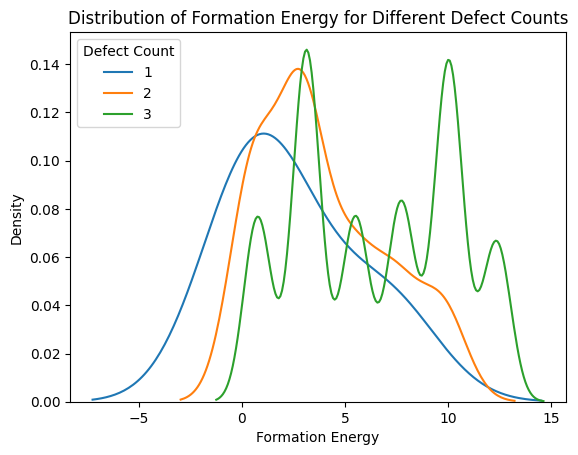

In [88]:
data = [flat_2DMMD_filtered.loc[flat_2DMMD_filtered['defect_count'] == count]['formation_energy'] for count in flat_2DMMD_filtered['defect_count'].unique()]
# Create a line plot for each defect_count group
fig, ax = plt.subplots()

# Group the data by defect_count and get the formation_energy for each group
grouped_data = flat_2DMMD_filtered.groupby('defect_count')['formation_energy'].apply(list)

for count, energy_list in grouped_data.items():
    sns.kdeplot(energy_list, ax=ax, label=str(count))

ax.set_xlabel('Formation Energy')
ax.set_ylabel('Density')
ax.set_title('Distribution of Formation Energy for Different Defect Counts')
ax.legend(title='Defect Count')

plt.show()

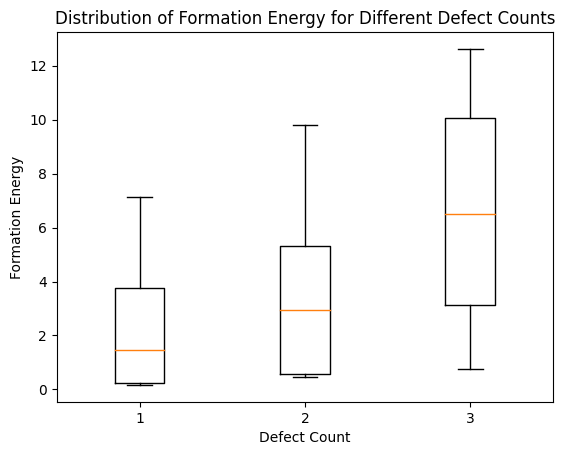

In [89]:
# Create a list of formation_energy for each defect_count value
data = [flat_2DMMD_filtered.loc[flat_2DMMD_filtered['defect_count'] == count]['formation_energy'] for count in sorted(flat_2DMMD_filtered['defect_count'].unique())]
# print(data[0])
# Plot a box plot for each defect_count group
fig, ax = plt.subplots()
ax.boxplot(data, labels=sorted(flat_2DMMD_filtered['defect_count'].unique()))

ax.set_xlabel('Defect Count')
ax.set_ylabel('Formation Energy')
ax.set_title('Distribution of Formation Energy for Different Defect Counts')

plt.show()

Scatter formation_energy - defect_number

In [90]:
flat_2DMMD_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5933 entries, 6141cf0efbfd4bd9ab2c2f7e to 615083823ac25c70a5c6ce03
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   formation_energy           5933 non-null   float64
 1   formation_energy_per_site  5933 non-null   float64
 2   defects                    5933 non-null   object 
 3   defect_count               5933 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 231.8+ KB


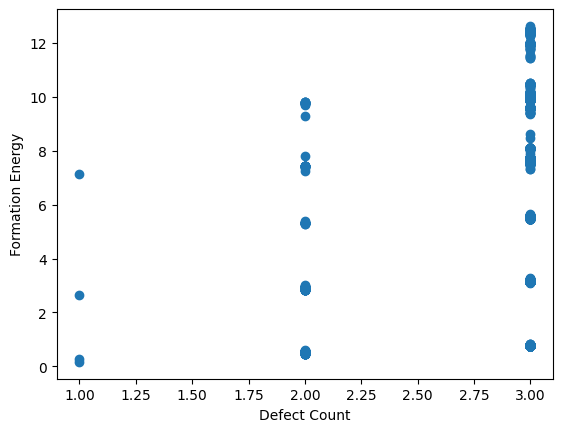

In [91]:
df = flat_2DMMD_filtered.copy()
# create a scatter plot
plt.scatter(df['defect_count'], df['formation_energy'])

# set the axis labels
plt.xlabel('Defect Count')
plt.ylabel('Formation Energy')

# show the plot
plt.show()


In [92]:
for i in range(1, 25):
    number = len(flat_2DMMD_filtered[flat_2DMMD_filtered['defects'].apply(lambda x: len(x) == i)])
    if number != 0:
        print(f"{number} configurations with {i} defects")

4 configurations with 1 defects
127 configurations with 2 defects
5802 configurations with 3 defects


In [93]:
# Define the defect types
defect_types_str = np.unique([str(j) for i in flat_2DMMD_filtered['defects'] for j in i])

defect_types_dicts = list(np.concatenate(flat_2DMMD_filtered.defects))

# Create indicator columns
for defect_type in defect_types_str:
    origin_dict = next(filter(lambda x:str(x) == defect_type, defect_types_dicts))
    
    column_name = origin_dict['type'] + "_"
    if "from" in origin_dict:
        column_name += origin_dict['from'] + "_"
    if "to" in origin_dict:
        column_name += origin_dict['to']
    if "element" in origin_dict:
        column_name += origin_dict['element']

    flat_2DMMD_filtered[column_name] = flat_2DMMD_filtered['defects'].apply(lambda x: sum([int(str(i) == defect_type) for i in x]))

# Print the updated DataFrame
flat_2DMMD_filtered.head()

,formation_energy,formation_energy_per_site,defects,defect_count,substitution_Mo_W,substitution_S_Se,vacancy_Mo,vacancy_S
_id,,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,2.645686,2.645686,"[{'type': 'vacancy', 'element': 'S'}]",1,0,0,0,1
6141cf0f51c1cbd9654b8870,5.306279,2.653139,"[{'type': 'vacancy', 'element': 'S'}, {'type':...",2,0,0,0,2
6141cf0fe689ecc4c43cdd4b,0.278959,0.278959,"[{'type': 'substitution', 'from': 'S', 'to': '...",1,0,1,0,0
6141cf10b842c2e72e2f2d44,0.579507,0.289753,"[{'type': 'substitution', 'from': 'S', 'to': '...",2,0,2,0,0
6141cf1051c1cbd9654b8872,5.326423,2.663212,"[{'type': 'vacancy', 'element': 'S'}, {'type':...",2,0,0,0,2


In [51]:
flat_2DMMD_filtered.head()

,formation_energy,formation_energy_per_site,defects,defect_count,substitution_B_C,substitution_Ga_In,substitution_In_Ga,substitution_Mo_W,substitution_N_C,substitution_P_N,...,substitution_W_Mo,vacancy_B,vacancy_Ga,vacancy_In,vacancy_Mo,vacancy_N,vacancy_P,vacancy_S,vacancy_Se,vacancy_W
_id,,,,,,,,,,,,,,,,,,,,,
P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f,4.230926,1.410309,"[{'type': 'vacancy', 'element': 'P'}, {'type':...",3,0,0,0,0,0,1,...,0,0,0,0,0,0,2,0,0,0
P_P141N1_2a285334-f6b0-498c-bb4a-788bfd4af4a6,3.601939,1.200646,"[{'type': 'vacancy', 'element': 'P'}, {'type':...",3,0,0,0,0,0,1,...,0,0,0,0,0,0,2,0,0,0
P_P141_83ddad39-bb28-4896-93f3-a97b8664304f,4.376173,1.458724,"[{'type': 'vacancy', 'element': 'P'}, {'type':...",3,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
P_P141N1_64f2c31f-7207-4897-9877-60187bcb87d4,3.900219,1.300073,"[{'type': 'vacancy', 'element': 'P'}, {'type':...",3,0,0,0,0,0,1,...,0,0,0,0,0,0,2,0,0,0
P_P141N1_af730d2e-7790-46db-8751-75e46bf49b68,4.253128,1.417709,"[{'type': 'vacancy', 'element': 'P'}, {'type':...",3,0,0,0,0,0,1,...,0,0,0,0,0,0,2,0,0,0


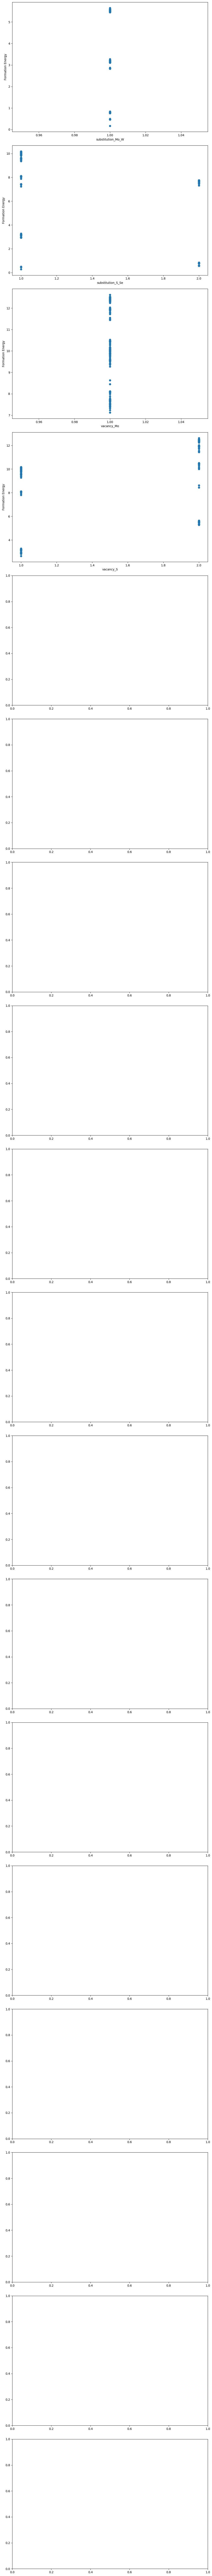

In [94]:
df = flat_2DMMD_filtered.copy()

fig, axs = plt.subplots(nrows=18, ncols=1, figsize=(10, 120))

index = 0
for i in flat_2DMMD_filtered.columns[4:]:
    # create a scatter plot
    # print(np.unique(df[i]))
    # plt.scatter(df[df[i]>0], df['formation_energy'])
    axs[index].scatter(df[df[i]>0][i], df[df[i]>0]['formation_energy'])
    axs[index].set_xlabel(f'{i}')
    axs[index].set_ylabel('Formation Energy')
    index += 1

# adjust the spacing between subplots
plt.tight_layout()

# show the plot
plt.show()


In [53]:
df = flat_2DMMD_filtered.copy()

# Select columns for defects and formation energy
defect_columns = df.columns[4:]
formation_energy_column = 'formation_energy'

# Create a new DataFrame with only the selected columns
selected_df = df[[formation_energy_column] + list(defect_columns)]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Print the correlation between each defect and formation energy
print("Correlation between each defect and formation energy:")
print(correlation_matrix[formation_energy_column])

Correlation between each defect and formation energy:
formation_energy      1.000000
substitution_B_C      0.689449
substitution_Ga_In    0.082109
substitution_In_Ga    0.066265
substitution_Mo_W     0.141759
substitution_N_C      0.691124
substitution_P_N      0.053732
substitution_S_Se     0.222639
substitution_Se_S     0.073327
substitution_W_Mo    -0.026019
vacancy_B             0.719033
vacancy_Ga            0.098823
vacancy_In            0.082861
vacancy_Mo            0.373892
vacancy_N             0.709285
vacancy_P             0.055633
vacancy_S             0.319043
vacancy_Se            0.193516
vacancy_W             0.166560
Name: formation_energy, dtype: float64


In [68]:
df = flat_2DMMD_filtered.copy()

defects = [
    'substitution_B_C',
    'substitution_Ga_In',
    'substitution_In_Ga',
    'substitution_Mo_W',
    'substitution_N_C',
    'substitution_P_N',
    'substitution_S_Se',
    'substitution_Se_S',
    'substitution_W_Mo',
    'vacancy_B',
    'vacancy_Ga',
    'vacancy_In',
    'vacancy_Mo',
    'vacancy_N',
    'vacancy_P',
    'vacancy_S',
    'vacancy_Se',
    'vacancy_W']

defect_pairs = list(itertools.combinations(defects, 2))

for pair in defect_pairs:
    col_name = pair[0] + '_' + pair[1]
    df[col_name] = df.apply(lambda x: 1 if x[pair[0]] > 0 and x[pair[1]] > 0 and (x[column] == 0 for column in defects if column != pair[0] and column != pair[1]) else 0, axis=1)

In [69]:
# Select columns for defects and formation energy
defect_columns = df.columns[22:]
formation_energy_column = 'formation_energy'

# Create a new DataFrame with only the selected columns
selected_df = df[[formation_energy_column] + list(defect_columns)]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Print the correlation between each defect and formation energy
print("Correlation between each defect and formation energy:")
print(correlation_matrix[formation_energy_column].dropna())

Correlation between each defect and formation energy:
formation_energy                                   1.000000
substitution_B_C_substitution_N_C_vacancy_B        0.709927
substitution_B_C_substitution_N_C_vacancy_N        0.712518
substitution_B_C_vacancy_B_vacancy_N               0.721696
substitution_Ga_In_substitution_Se_S_vacancy_Ga    0.095563
substitution_Ga_In_substitution_Se_S_vacancy_Se    0.095888
substitution_Ga_In_vacancy_Ga_vacancy_Se           0.102974
substitution_In_Ga_substitution_Se_S_vacancy_In    0.080905
substitution_In_Ga_substitution_Se_S_vacancy_Se    0.079350
substitution_In_Ga_vacancy_In_vacancy_Se           0.085866
substitution_Mo_W_substitution_S_Se_vacancy_Mo     0.406746
substitution_Mo_W_substitution_S_Se_vacancy_S      0.321772
substitution_Mo_W_vacancy_Mo_vacancy_S             0.413413
substitution_N_C_vacancy_B_vacancy_N               0.718380
substitution_S_Se_vacancy_Mo_vacancy_S             0.411190
substitution_Se_S_substitution_W_Mo_vacancy_Se

In [71]:
df = flat_2DMMD_filtered

defects = [
    'substitution_B_C',
    'substitution_Ga_In',
    'substitution_In_Ga',
    'substitution_Mo_W',
    'substitution_N_C',
    'substitution_P_N',
    'substitution_S_Se',
    'substitution_Se_S',
    'substitution_W_Mo',
    'vacancy_B',
    'vacancy_Ga',
    'vacancy_In',
    'vacancy_Mo',
    'vacancy_N',
    'vacancy_P',
    'vacancy_S',
    'vacancy_Se',
    'vacancy_W']

defect_pairs = list(itertools.combinations(defects, 3))

for pair in defect_pairs:
    col_name = pair[0] + '_' + pair[1] + '_' + pair[2]
    df[col_name] = df.apply(lambda x: x[pair[0]] + x[pair[1]] + x[pair[2]] if x[pair[2]] > 0 and x[pair[0]] > 0 and x[pair[1]] > 0 and (x[column] == 0 for column in defects if column != pair[2] and column != pair[0] and column != pair[1]) else 0, axis=1)

In [ ]:
# Select columns for defects and formation energy
defect_columns = df.columns[22:]
formation_energy_column = 'formation_energy'

# Create a new DataFrame with only the selected columns
selected_df = df[[formation_energy_column] + list(defect_columns)]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Print the correlation between each defect and formation energy
print("Correlation between each defect and formation energy:")
print(correlation_matrix[formation_energy_column].dropna())

Correlation between each defect and formation energy:
formation_energy                                   1.000000
substitution_B_C_substitution_N_C_vacancy_B        0.709927
substitution_B_C_substitution_N_C_vacancy_N        0.712518
substitution_B_C_vacancy_B_vacancy_N               0.721696
substitution_Ga_In_substitution_Se_S_vacancy_Ga    0.095563
substitution_Ga_In_substitution_Se_S_vacancy_Se    0.095888
substitution_Ga_In_vacancy_Ga_vacancy_Se           0.102974
substitution_In_Ga_substitution_Se_S_vacancy_In    0.080905
substitution_In_Ga_substitution_Se_S_vacancy_Se    0.079350
substitution_In_Ga_vacancy_In_vacancy_Se           0.085866
substitution_Mo_W_substitution_S_Se_vacancy_Mo     0.406746
substitution_Mo_W_substitution_S_Se_vacancy_S      0.321772
substitution_Mo_W_vacancy_Mo_vacancy_S             0.413413
substitution_N_C_vacancy_B_vacancy_N               0.718380
substitution_S_Se_vacancy_Mo_vacancy_S             0.411190
substitution_Se_S_substitution_W_Mo_vacancy_Se

In [75]:
for triplet in df.columns[22:]:
    triplets = df[df[triplet] > 0]
    if triplets.size == 0:
        continue
    triplets = triplets.drop(columns=triplets.columns[22:]) # delete other triplets info
    # Create a new DataFrame with only the selected columns
    selected_df = triplets[[formation_energy_column] + defects]

    # Calculate the correlation matrix
    correlation_matrix = selected_df.corr()

    # Print the correlation between each defect and formation energy
    print(f"Correlation between each defect and formation energy in the triplet {triplet}:")
    print(correlation_matrix[formation_energy_column].dropna())

Correlation between each defect and formation energy in the triplet substitution_B_C_substitution_N_C_vacancy_B:
formation_energy    1.000000
substitution_B_C    0.616696
substitution_N_C    0.591900
vacancy_B           0.819413
vacancy_N           0.811262
Name: formation_energy, dtype: float64
Correlation between each defect and formation energy in the triplet substitution_B_C_substitution_N_C_vacancy_N:
formation_energy    1.000000
substitution_B_C    0.694552
substitution_N_C    0.595276
vacancy_B           0.857102
vacancy_N           0.783464
Name: formation_energy, dtype: float64
Correlation between each defect and formation energy in the triplet substitution_B_C_vacancy_B_vacancy_N:
formation_energy    1.000000
substitution_B_C    0.683440
substitution_N_C    0.654777
vacancy_B           0.825287
vacancy_N           0.796771
Name: formation_energy, dtype: float64
Correlation between each defect and formation energy in the triplet substitution_Ga_In_substitution_Se_S_vacancy_Ga: